### Analysis of Epinions Data

We are provided with the Epinions data collected through a general consumer review web site Epinions.com. Each user on the site can rate and post a review for products (items) and other users would rate the review to show the helpfulness of the review.
In this data, for each user, we have user ID, gender, ratings (1-5) and reviews towards the products they bought. For each rating, we have the product name and its category, the rating score, the time point when the rating is created, and the helpfulness (1-6) of this rating.

Originally, there are several separate files to record the user-item rating info, user demographic info and item descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'Epinions_test_data.csv'. The header of the csv file is shown below. 


| userId | gender | rating | review| item | category | helpfulness | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __item__ - the product's name
* __category__ - the category of the item
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __helpfulness__ - the helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created

Note that, a same user (i.e., a same userId) corresponds to a same gender; a same item corresponds to a same category; a same user (i.e., a same userId) may rate multiple items; a same item may receive ratings and reviews from multiple users and each review is associted with a single helpfulness value calculated based on the feedbacks from other users.

There are four questions to explore with the data as shown below.

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
# your code and solutions

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set_theme()

##### Examine raw data

In [2]:
epinions_raw = pd.read_csv('Epinions_test_data.csv')

## descriptive statistics
epinions_raw.describe()

,userId,rating,helpfulness,timestamp
count,10000.000000,9969.000000,9974.000000,10000.000000
mean,7716.637600,3.701876,3.736615,58437.917000
std,4646.341186,1.386560,1.527681,37582.469725
min,3.000000,1.000000,1.000000,10100.000000
25%,3569.000000,3.000000,3.000000,21700.000000
50%,7762.000000,4.000000,4.000000,52500.000000
75%,11726.000000,5.000000,5.000000,90999.000000
max,15730.000000,5.000000,6.000000,123199.000000


##### Count rows that need to be removed

In [3]:
## gender/rating/helpfulness is missing
missing_rows = epinions_raw[(epinions_raw.gender.isna() == True) | (epinions_raw.rating.isna()) | (epinions_raw.helpfulness.isna() == True)]
missing_rows.head()

,userId,gender,item,rating,review,helpfulness,timestamp,category
39,4668,NaN,Amazon.com,2.0,terrible customer service. Would not recommend...,1.0,10903,Online Stores & Services
96,4842,NaN,Bank of America,1.0,a VERY unreliable bank!,1.0,21500,Personal Finance
111,9395,NaN,Playtex Diaper Genie System,1.0,diaper genie? DIAPER DUD!,2.0,20300,Kids & Family
262,12103,F,PayPal,4.0,Paypal,NaN,122601,Personal Finance
588,1861,M,AOL (America Online),NaN,BEWARE!,1.0,21500,Online Stores & Services


In [4]:
## review is none
rev_none_rows = epinions_raw[epinions_raw.review == 'none']
rev_none_rows.head()

,userId,gender,item,rating,review,helpfulness,timestamp,category
321,667,M,eBay,5.0,none,4.0,91501,Online Stores & Services
438,4572,F,Green Mile,5.0,none,4.0,20400,Movies
979,9282,F,United Airlines,4.0,none,3.0,11700,Hotels & Travel
1510,10166,M,MyPoints.com,5.0,none,6.0,42700,Online Stores & Services
1669,12028,M,Olive Garden,4.0,none,3.0,31201,Restaurants & Gourmet


In [5]:
print('Original data has', len(epinions_raw), 'rows')
print('There are', len(missing_rows),
      'rows where gender/rating/helpfulness is missing')
print('There are', len(rev_none_rows), 'rows where review is none')

# combine two filters and remove
remove_index = missing_rows.index.union(rev_none_rows.index)
print('In combine, there are', len(remove_index), 'rows needed to be removed')
epinions_clean = epinions_raw.drop(index=remove_index)
print('Data after removal has', len(epinions_clean), 'rows')
epinions_clean.describe()

Original data has 10000 rows
There are 84 rows where gender/rating/helpfulness is missing
There are 27 rows where review is none
In combine, there are 110 rows needed to be removed
Data after removal has 9890 rows


,userId,rating,helpfulness,timestamp
count,9890.000000,9890.000000,9890.000000,9890.000000
mean,7717.263296,3.701517,3.736603,58447.585238
std,4646.622934,1.387026,1.528204,37553.717731
min,3.000000,1.000000,1.000000,10100.000000
25%,3569.000000,3.000000,3.000000,21700.000000
50%,7780.000000,4.000000,4.000000,52500.000000
75%,11726.750000,5.000000,5.000000,90900.000000
max,15730.000000,5.000000,6.000000,123199.000000


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


##### Q2.1: Uniqueness

In [6]:
# your code and solutions
print('Number of unique for each fields is describe in the below table')
epinions_clean.nunique()

Number of unique for each fields is describe in the below table


userId         4326
gender            2
item             89
rating            5
review         9727
helpfulness       6
timestamp      1629
category          9
dtype: int64

##### Q2.2: descriptive statistics for Rating column

In [7]:
epinions_clean.rating.describe()

count    9890.000000
mean        3.701517
std         1.387026
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

##### Q2.3: descriptive statistic for items by genders

In [8]:
## group number of ratings by userId, because each userId correspond to a gender
items_by_user = epinions_clean[['item','userId','gender']].groupby(by=['userId','gender']).count().reset_index().sort_values(by='item')
print('Number of item review by each user')
items_by_user.tail()

Number of item review by each user


,userId,gender,item
73,201,M,14
249,667,F,16
5551,15180,F,17
250,667,M,17
1399,3683,F,18


In [9]:
## descriptive statistics for both genders
print('Descriptive statistic for each genders')
items_by_user.groupby('gender').item.describe()

Descriptive statistic for each genders


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,2924.0,1.718536,1.419689,1.0,1.0,1.0,2.0,18.0
M,2824.0,1.722734,1.416954,1.0,1.0,1.0,2.0,17.0


##### Q2.4: descriptive statistics for number of ratings by items

In [10]:
## number of rating received by each items
rating_by_item = epinions_clean[['item', 'rating']].groupby(by=['item']).count().reset_index().sort_values(by='rating')
print('Number of rating correspond to each item')
rating_by_item.tail()

Number of rating correspond to each item


,item,rating
41,McDonald's,184
46,NetZero,190
88,eBay,295
1,All Advantage,306
0,AOL (America Online),446


In [11]:
## descriptive statistics for number of ratings
print('Descriptive statistic for number of rating for each items')
rating_by_item.rating.describe()

Descriptive statistic for number of rating for each items


count     89.000000
mean     111.123596
std       55.955709
min       60.000000
25%       82.000000
50%       92.000000
75%      121.000000
max      446.000000
Name: rating, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

##### Q3.1: Inspecting the correlation

In [12]:
# your code and solutions
## calculate correlation
corr = epinions_clean.corr()
corr

/var/folders/wn/qqns388d55l547dg89zgbmfw0000gn/T/ipykernel_12740/3207381408.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = epinions_clean.corr()


,userId,rating,helpfulness,timestamp
userId,1.000000,-0.011542,-0.005755,0.027715
rating,-0.011542,1.000000,0.856504,-0.026702
helpfulness,-0.005755,0.856504,1.000000,-0.018776
timestamp,0.027715,-0.026702,-0.018776,1.000000


Text(0.5, 1.0, 'Heatmap of correlation in Epinion data')

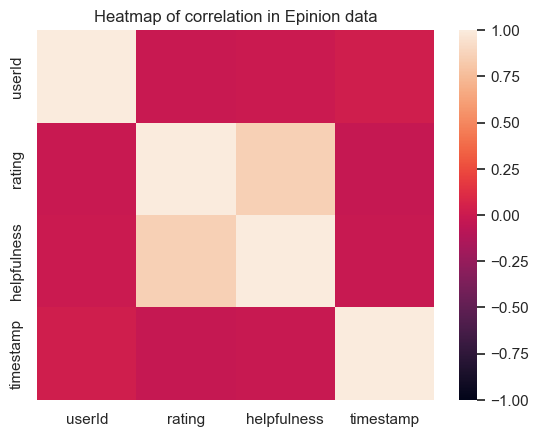

In [13]:
## heatmap
heatmap = sns.heatmap(data=corr, vmax=1,vmin=-1)
heatmap.set_title('Heatmap of correlation in Epinion data')

As can be seen from the correlation table and the heatmap, while **rating and helpfulness** shows a high correlation score, at **0.86**, others pair show much lower correlation scores, at between **-0.06 and 0.06**. 

We can look further into the rating-helpfulness relation by plotting a scatter plot.

Text(0.5, 1.0, 'Positive correlation between helpfuness and rating')

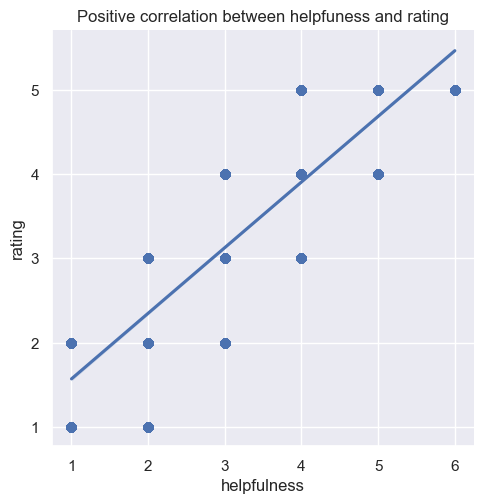

In [14]:
## scatter plot for helpfuness and rating
sns.lmplot(x='helpfulness', y='rating', data=epinions_clean,
           scatter_kws={'alpha': 0.2})
plt.title('Positive correlation between helpfuness and rating')

The scatterplot shows a clear positive relation between rating and helpfulness, with higher rating score often goes with higher helpfulness. 

Notably, no review with **high rating**(rating= 4,5) having **low helpfulness score**(helpfulness=1,2). Similarly, there is **no** review with low helpfulness score and high rating in the data.

##### Q3.2: Male - Female rating tendency

First, we can look at the descriptive statistic of rating by genders

In [15]:
## group data by gender and only look at the rating
male_rating=epinions_clean[epinions_clean.gender == 'M']
female_rating=epinions_clean[epinions_clean.gender == 'F']
epinions_clean.groupby('gender').rating.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,5025.0,3.712040,1.387954,1.0,3.0,4.0,5.0,5.0
M,4865.0,3.690647,1.386126,1.0,3.0,4.0,5.0,5.0


As can be seen, there is not much a difference between figures of male and female.

Next, let's look at the rating distribution of both gender.

Text(0.5, 0.98, 'Distribution of male and female rating')

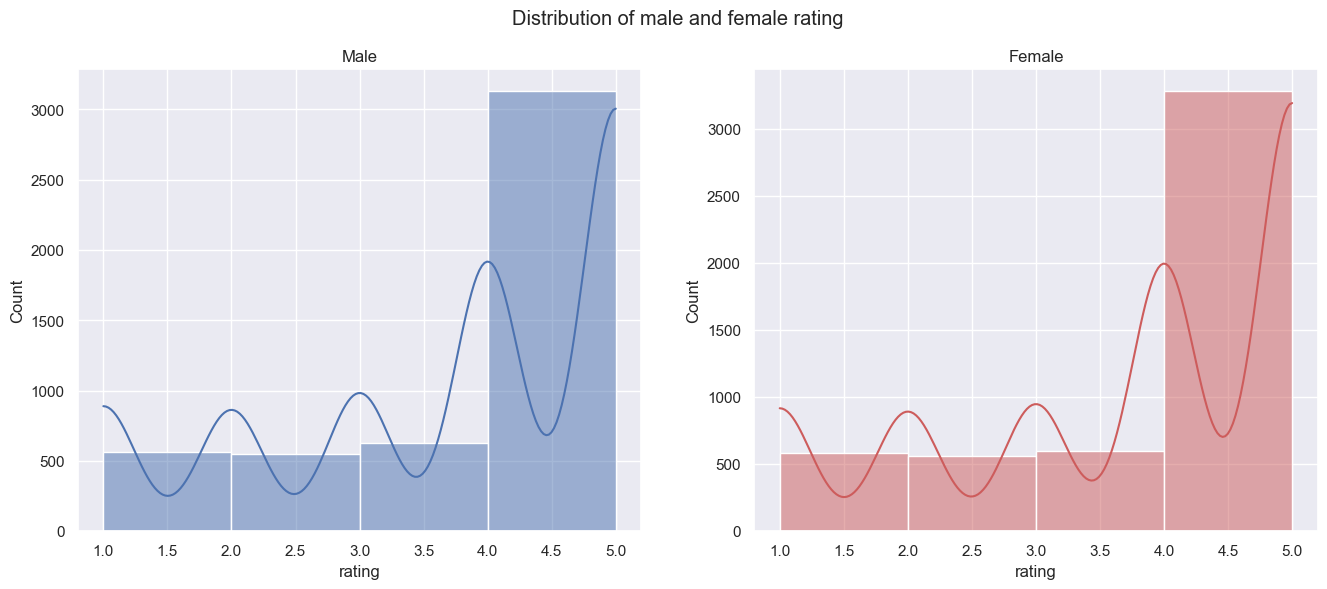

In [16]:
## histogram for both gender separately
hist_fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.histplot(male_rating, x='rating',
             kde=True,binwidth=1)
plt.title('Male')
plt.subplot(1, 2, 2)
sns.histplot(female_rating, x='rating',
             kde=True,binwidth=1,color='indianred')
plt.title('Female')
hist_fig.suptitle('Distribution of male and female rating')


Histograms shows the distribution of male vs female ratings, and there seems to be little difference between the two. Both are unimodal distribution with mode are at **5 rating score**, and both are left skewed with the highest bin at 5 rating score. We can take a further look if there is a different by a box plot.

Text(0.5, 1.0, 'Male and Female rating comparision')

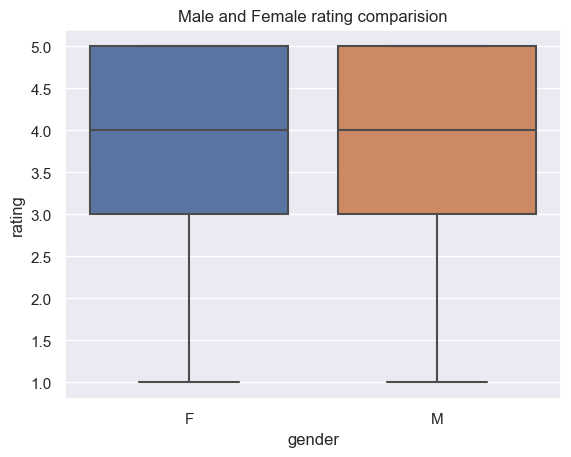

In [17]:
sns.boxplot(data=epinions_clean, x='gender', y='rating')
plt.title('Male and Female rating comparision')

From the box plots, we can see that the median male rating is 4 score
and the median female life expectancy is also 4 score. The variability of the interquartile range is equal for males and females. There are no outliers for either gender.

Therefore, the hypothesis that female/male users tend to provide higher ratings than male/female users is not true with the given dataset.

##### Q3.3: Overall summary

In conclusion, after doing some data exploration, we can conclude that with the given dataset, there is a positive relation between **rating and helpfulness**. On the other hand, the hypothesis that the gender of user can affect rating score is showed to be not true in this case.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [18]:
# your code and solutions
print('Length of data before remove outliers', len(epinions_clean))

Length of data before remove outliers 9890


##### Q4.1: Reviews of which the helpfulness is no more than 2

In [19]:

## reviews of which the helpfulness is no more than 2
low_rating = epinions_clean[epinions_clean.helpfulness <= 2]
print('Number of reviews with no more than 2 helpfulness score:', len(low_rating))
low_rating.head()

Number of reviews with no more than 2 helpfulness score: 2328


,userId,gender,item,rating,review,helpfulness,timestamp,category
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
6,9525,M,Applebee's,2.0,Not my first dining choice - Applebee's (the W...,2.0,83105,Restaurants & Gourmet
18,9765,M,All Advantage,1.0,How Low will they go??,2.0,100700,Online Stores & Services
22,11818,F,Scary Movie,3.0,A great see-it-once comedy,2.0,61201,Movies
23,11818,M,AOL (America Online),2.0,AOL still hasn't changed since it's debut,2.0,61501,Online Stores & Services


In [20]:
## drop low rating reviews
epinions_final = epinions_clean.drop(index=low_rating.index)
print("The minimum rating now increase to 3")
epinions_final.helpfulness.describe()

The minimum rating now increase to 3


count    7562.000000
mean        4.420788
std         0.994300
min         3.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: helpfulness, dtype: float64

##### Q4.2: Users who rated less than 7 items

In [21]:
## item_by_user is contructed in Q2.3
items_by_user = epinions_final[['item','userId',]].groupby(by=['userId']).count().reset_index().sort_values(by='item')

## users who rate less then 7 items
user_few_rating = items_by_user[items_by_user.item < 7]
print('Number of users who rate less than 7 items:', len(user_few_rating))
user_few_rating.tail()

Number of users who rate less than 7 items: 3532


,userId,item
937,3868,6
1528,6424,6
1348,5735,6
400,1646,6
1901,8215,6


In [22]:
## remove user with few ratings
epinions_final = epinions_final[epinions_final.userId.isin(user_few_rating.userId) == False]

print("The minimum number of items rated by user now increase to 7")
epinions_final[['item','userId',]].groupby(by=['userId',]).count().reset_index().sort_values(by='item').item.describe()

The minimum number of items rated by user now increase to 7


count    135.000000
mean       9.570370
std        3.324582
min        7.000000
25%        7.000000
50%        9.000000
75%       10.000000
max       23.000000
Name: item, dtype: float64

##### Q4.3: Items that received less than 11 ratings

In [23]:
## rating_by_item come from Q2.4
rating_by_item = epinions_final[['item', 'rating']].groupby(by=['item']).count().reset_index().sort_values(by='rating')

## items that received less than 11 ratings
few_rating_items = rating_by_item[rating_by_item.rating < 11]
print('Number of items that received less than 11 ratings:',len(few_rating_items))
few_rating_items.head()

Number of items that received less than 11 ratings: 32


,item,rating
81,Treeloot.com,1
57,Quicken Loans,1
2,Alta Vista (by 1stUp),3
70,Spedia,3
55,Playtex Diaper Genie System,3


In [24]:
## remove items that have few ratings
epinions_final = epinions_final[epinions_final.item.isin(few_rating_items.item) == False]

print('Minimum rating of an item now increased above 11')
epinions_final[['item', 'rating']].groupby(by=['item']).count().reset_index().sort_values(by='rating').rating.describe()

Minimum rating of an item now increased above 11


count    57.000000
mean     18.947368
std       6.677310
min      11.000000
25%      14.000000
50%      17.000000
75%      25.000000
max      36.000000
Name: rating, dtype: float64

##### Q4.4: Output final data to Epinion_clea_data.csv

In [26]:
print('Length of data after remove outliers', len(epinions_final))
## output the final data to csv file
epinions_final.to_csv('Epinion_clean_data.csv')

Length of data after remove outliers 1080
